# 21장 무작위 시험과 가설 검정

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/21장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import matplotlib.pyplot as plt

#선 두께
plt.rcParams['lines.linewidth'] = 4
#제목 폰트 크기
plt.rcParams['axes.titlesize'] = 16
#축 레이블 폰트 크기
plt.rcParams['axes.labelsize'] = 16
#x 축 텍스트 크기
plt.rcParams['xtick.labelsize'] = 16
#y 축 텍스트 크기
plt.rcParams['ytick.labelsize'] = 16
#x 축 눈금 크기
plt.rcParams['xtick.major.size'] = 7
#y 축 눈금 크기
plt.rcParams['ytick.major.size'] = 7
#마커 크기
plt.rcParams['lines.markersize'] = 10
#범례를 표시할 때 마커 표시 개수
plt.rcParams['legend.numpoints'] = 1
#범례 텍스트 크기
plt.rcParams['legend.fontsize'] = 14

In [2]:
import random

random.seed(148)
treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 100
treatment_times, control_times = [], []
for s in range(sample_size):
    treatment_times.append(random.gauss(treatment_dist[0],
                                        treatment_dist[1]))
    control_times.append(random.gauss(control_dist[0],
                                      control_dist[1]))
control_mean = sum(control_times)/len(control_times)
treatment_mean = sum(treatment_times)/len(treatment_times)

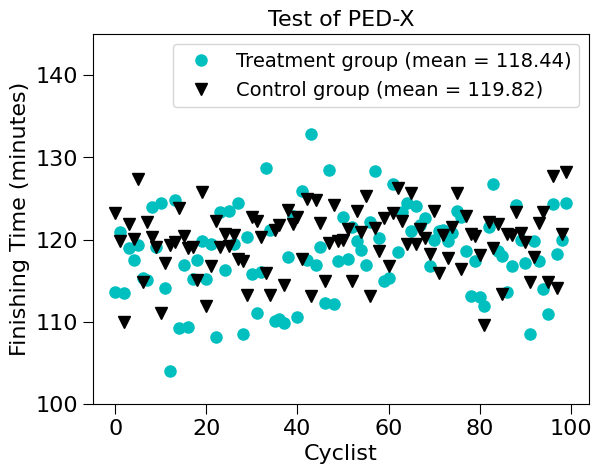

In [3]:
plt.plot(treatment_times, 'co', markersize = 8,
         label = 'Treatment group (mean = ' +
         str(round(treatment_mean, 2)) + ')')
plt.plot(control_times, 'kv', markersize = 8,
         label = 'Control group (mean = ' +
         str(round(control_mean,2)) + ')')
plt.title('Test of PED-X')
plt.xlabel('Cyclist')
plt.ylabel('Finishing Time (minutes)')
plt.ylim(100, 145)
plt.legend()

## 21.1 유의성 검증하기

그림 21-3 t-점수 그리기

Text(0, 0.5, 'Probability')

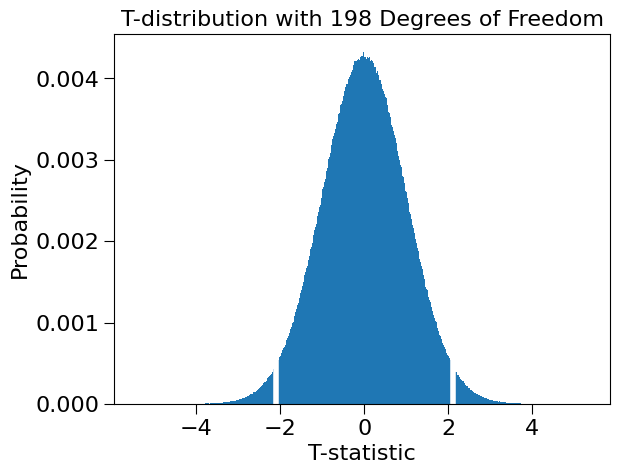

In [4]:
import scipy
import numpy as np

t_stat = -2.11 #PED-X 예제의 t-점수
t_dist = []
num_bins = 1000
for i in range(10000000):
    t_dist.append(scipy.random.standard_t(198))
plt.hist(t_dist, bins = num_bins,
         weights = np.array(len(t_dist)*[1.0])/len(t_dist))
plt.axvline(t_stat, color = 'w')
plt.axvline(-t_stat, color = 'w')
plt.title('T-distribution with 198 Degrees of Freedom')
plt.xlabel('T-statistic')
plt.ylabel('Probability')

그림 21-5 t-점수와 p-값 계산하여 출력하기

In [5]:
import scipy.stats

control_mean = round(sum(control_times)/len(control_times), 2)
treatment_mean = round(sum(treatment_times)/len(treatment_times), 2)
print('실험군의 평균 - 대조군의 평균 =',
      round(treatment_mean - control_mean, 2), '분')
two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                        control_times,
                                        equal_var = False)
print('2표본 검정의 t-점수는', round(two_sample_test[0], 2))
print('2표본 검정의 p-값은', round(two_sample_test[1], 2))

실험군의 평균 - 대조군의 평균 = -1.38 분
2표본 검정의 t-점수는 -2.11
2표본 검정의 p-값은 0.04


Text(0.5, 0, 'p-value')

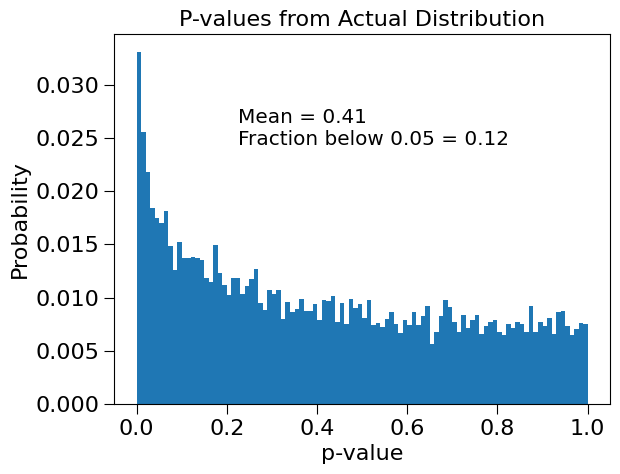

In [6]:
random.seed(0)

treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 100
p_vals = []
for _ in range(10000):
    treatment_times, control_times = [], []
    for s in range(sample_size):
        treatment_times.append(random.gauss(treatment_dist[0],
                                            treatment_dist[1]))
        control_times.append(random.gauss(control_dist[0],
                                          control_dist[1]))
    two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                            control_times,
                                            equal_var = False)
    p_vals.append(two_sample_test[1])
mean = sum(p_vals)/len(p_vals)
num_below = 0
cut_off = 0.05 
for e in p_vals:
    if e <= cut_off:
        num_below += 1
frac_below = round(num_below/len(p_vals), 2)
plt.hist(p_vals, weights = np.array(len(p_vals)*[1])/len(p_vals),
         bins = 100)
plt.annotate('Mean = ' + str(round(mean, 2))
             + '\nFraction below ' + str(cut_off) + ' = ' +
             str(frac_below),
             size = 'x-large',
             xycoords = 'axes fraction', xy = (0.25, 0.7))
plt.title('P-values from Actual Distribution')
plt.ylabel('Probability')
plt.xlabel('p-value')

Text(0.5, 0, 'p-value')

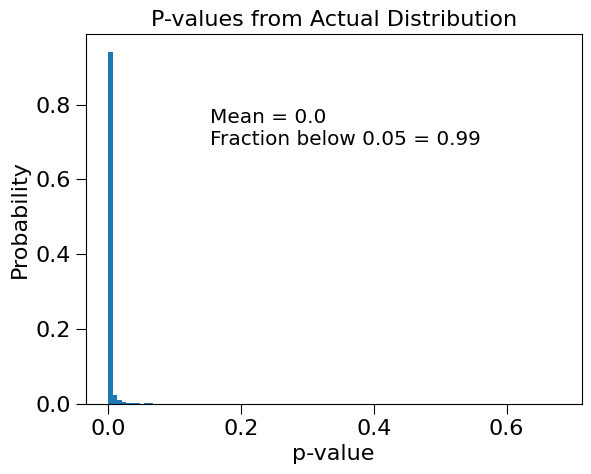

In [7]:
random.seed(0)

treatment_dist = (119.5, 5.0)
control_dist = (120, 4.0)
sample_size = 3000
p_vals = []
for _ in range(10000):
    treatment_times, control_times = [], []
    for s in range(sample_size):
        treatment_times.append(random.gauss(treatment_dist[0],
                                            treatment_dist[1]))
        control_times.append(random.gauss(control_dist[0],
                                          control_dist[1]))
    two_sample_test = scipy.stats.ttest_ind(treatment_times,
                                            control_times,
                                            equal_var = False)
    p_vals.append(two_sample_test[1])
mean = sum(p_vals)/len(p_vals)
num_below = 0
cut_off = 0.05 
for e in p_vals:
    if e <= cut_off:
        num_below += 1
frac_below = round(num_below/len(p_vals), 2)
plt.hist(p_vals, weights = np.array(len(p_vals)*[1])/len(p_vals),
         bins = 100)
plt.annotate('Mean = ' + str(round(mean, 2))
             + '\nFraction below ' + str(cut_off) + ' = ' +
             str(frac_below),
             size = 'x-large',
             xycoords = 'axes fraction', xy = (0.25, 0.7))
plt.title('P-values from Actual Distribution')
plt.ylabel('Probability')
plt.xlabel('p-value')

## 21.3 단측 1표본 검정

In [8]:
random.seed(148)
treatment_dist = (119.5, 5.0)
sample_size = 100
treatment_times= []
for s in range(sample_size):
    treatment_times.append(random.gauss(treatment_dist[0],
                                        treatment_dist[1]))

one_sample_test = scipy.stats.ttest_1samp(treatment_times, 120)
print('1표본 검정의 t-점수는', one_sample_test[0])
print('1표본 검정의 p-값은', one_sample_test[1])

1표본 검정의 t-점수는 -3.532797857033048
1표본 검정의 p-값은 0.0006264237879103159


## 21.4 유의한가요? 유의하지 않은가요?

In [9]:
num_games = 1273
lyndsay_wins = 666
outcomes = [1.0]*lyndsay_wins + [0.0]*(num_games - lyndsay_wins)
print('1표본 검정의 p-값은',
      scipy.stats.ttest_1samp(outcomes, 0.5)[1])

1표본 검정의 p-값은 0.0982205871243577


그림 21-8 린제이의 게임 시뮬레이션

In [10]:
np.random.seed(0)

num_games = 1273
lyndsay_wins = 666
num_trials = 10000
at_least = 0
for t in range(num_trials):
    l_wins, j_wins = 0, 0
    for g in range(num_games):
        if random.random() < 0.5:
            l_wins += 1
        else:
            j_wins += 1
    if l_wins >= lyndsay_wins:
        at_least += 1
print('적어도 우연으로 이런 극단적인 결과를 얻을 확률 =', 
      at_least/num_trials)

적어도 우연으로 이런 극단적인 결과를 얻을 확률 = 0.0497


그림 21-9 올바른 게임 시뮬레이션

In [11]:
np.random.seed(0)

num_games = 1273
lyndsay_wins = 666
num_trials = 10000
at_least = 0
for t in range(num_trials):
    l_wins, j_wins = 0, 0
    for g in range(num_games):
        if random.random() < 0.5:
            l_wins += 1
        else:
            j_wins += 1
    if l_wins >= lyndsay_wins or j_wins >= lyndsay_wins:
        at_least += 1
print('적어도 우연으로 이런 극단적인 결과를 얻을 확률 =', 
      at_least/num_trials)

적어도 우연으로 이런 극단적인 결과를 얻을 확률 = 0.1047


**손가락 운동**

In [12]:
print('2표본 검정의 p-값은',
      scipy.stats.ttest_ind([1.0]*607+[0.0]*666, [1.0]*479+[0.0]*443)[1])

2표본 검정의 p-값은 0.04832710677432093


## 21.5 표본 크기는?

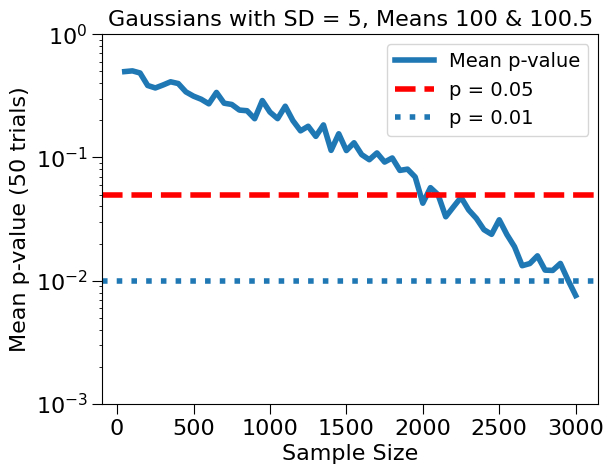

In [13]:
random.seed(0)
num_trials = 50
gaussian_1, gaussian_2 = [], []
for _ in range(3100):
    gaussian_1.append(random.gauss(100, 5))
    gaussian_2.append(random.gauss(100.5, 5))
p_vals_means = []
for sample_size in range(50, 3040, 50):
    p_vals = []
    for t in range(num_trials):
        sample_1 = random.sample(gaussian_1, sample_size)
        sample_2 = random.sample(gaussian_2, sample_size)
        p_vals.append(scipy.stats.ttest_ind(sample_1, sample_2)[1])
    p_vals_means.append(sum(p_vals)/len(p_vals))
plt.plot(range(50, 3040, 50), p_vals_means, label = 'Mean p-value')
plt.ylabel('Mean p-value (50 trials)')
plt.xlabel('Sample Size')
plt.title('Gaussians with SD = 5, Means 100 & 100.5')
plt.axhline(0.05, color = 'r', linestyle = 'dashed', label = 'p = 0.05')
plt.axhline(0.01, linestyle = ':', label = 'p = 0.01')
plt.yticks(np.arange(0, 1, 0.1))
plt.semilogy()
plt.ylim(10e-4, 1)
plt.legend()

## 21.6 다중 가설

In [14]:
def get_BM_data(filename):
    """주어진 파일의 내용을 읽습니다.
       파일은 CSV 포맷이고 다음과 같은 6개의 항목으로 이루어졌다고 가정합니다.
       0. 이름 (문자열), 1. 성별 (문자열), 2 나이 (정수)
       3. 부문 (정수), 4. 국적 (문자열), 5. 시간 (실수)
       반환값: 6개 항목에 대한 리스트를 담은 딕셔너리"""

    data = {}
    with open(filename, 'r') as f:
        f.readline() #첫 번째 줄은 버립니다
        line = f.readline()
        for k in ('name', 'gender', 'age', 'division',
                  'country', 'time'):
            data[k] = []
        while line != '':
            split = line.split(',')
            data['name'].append(split[0])
            data['gender'].append(split[1])
            data['age'].append(int(split[2]))
            data['division'].append(int(split[3]))
            data['country'].append(split[4])
            data['time'].append(float(split[5][:-1])) #remove \n
            line = f.readline()
    return data

그림 21-11 몇몇 나라의 평균 완주 시간 비교하기

In [15]:
data = get_BM_data('bm_results2012.csv')
countries_to_compare = ['BEL', 'BRA', 'FRA', 'JPN', 'ITA']

#여성 선수의 완주 시간의 리스트를 딕셔너리에 매핑합니다
country_times = {}
for i in range(len(data['name'])): #각 선수에 대해
    if (data['country'][i] in countries_to_compare and
        data['gender'][i] == 'F'):
        try:
            country_times[data['country'][i]].append(data['time'][i])
        except KeyError:
            country_times[data['country'][i]] = [data['time'][i]]

#완주 시간 비교
for c1 in countries_to_compare:
    for c2 in countries_to_compare:
        if c1 < c2: # 매 국가 쌍마다 검정하기 때문에 != 가 아니라 <을 사용합니다.
            pVal = scipy.stats.ttest_ind(country_times[c1],
                                         country_times[c2],
                                         equal_var = False)[1]
            if pVal < 0.05:
                print(c1, '와', c2, '는 평균 크게 다릅니다,',
                      'p-값 =', round(pVal, 4))

ITA 와 JPN 는 평균 크게 다릅니다, p-값 = 0.025


그림 21-12 다중 검정 확인하기

In [16]:
np.random.seed(0)

num_hyps = 50
sample_size = 200
population = []
for i in range(5000): #큰 모집단을 만듭니다
    population.append(random.gauss(0, 1))
sample1s, sample2s = [], []
#작은 크기의 표본 쌍을 많이 생성합니다
for i in range(num_hyps):
    sample1s.append(random.sample(population, sample_size))
    sample2s.append(random.sample(population, sample_size))
#통계적으로 유의한 차이가 있는 쌍을 확인합니다
numSig = 0
for i in range(num_hyps):
    if scipy.stats.ttest_ind(sample1s[i], sample2s[i])[1] < 0.05:
        numSig += 1
print('통계적으로 유의하게 다른 (p < 0.05) 쌍의 개수 =', numSig)

통계적으로 유의하게 다른 (p < 0.05) 쌍의 개수 = 3


## 21.7 조건부 확률과 베이즈 통계

### 21.7.1 조건부 확률

**손가락 운동**

In [17]:
from scipy.stats import norm

print(0.5 * (1 - norm.cdf(180, 210, 30)))

0.42067237303427146


In [18]:
1 - norm.cdf(180, 210, 30)

0.8413447460685429

### 21.7.2 베이즈 정리